In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

In [56]:
data = pd.read_csv("C:/Runyao/11.23/concate_all.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,Start_Vgs,End_Vgs,Mean_Vgs,Max_Vgs,Min_Vgs,AutoCorr_Mean_Vgs,Energy_Vgs,label
0,0,ScopeData_135L0636_155020200_T2_100_2447_0_1_D...,-4.289999,-3.68,-4.047227,-0.86,-8.020000,12293.736527,-0.000012,1
1,1,ScopeData_135L0636_155020200_T2_101_2448_0_1_D...,-4.190000,-3.68,-4.028073,0.10,-8.940000,12177.819805,-0.000012,1
2,2,ScopeData_135L0636_155020200_T2_102_2449_0_1_D...,-4.140000,-3.60,-3.960613,-2.16,-6.730000,11773.011529,-0.000012,1
3,3,ScopeData_135L0636_155020200_T2_103_2450_0_1_D...,-4.220000,-3.62,-4.014753,-0.09,-8.629999,12097.391208,-0.000012,1
4,4,ScopeData_135L0636_155020200_T2_103_2493_1_1_D...,-4.180000,-3.66,-4.026740,0.04,-9.240000,12169.757789,-0.000012,1


In [57]:
module_name = data.iloc[:,1].tolist()
x = data.iloc[:,2:-1]
y = data.iloc[:,-1].tolist()
data.drop(columns=data.columns[[0,1]], axis=1, inplace=True)
data.head()

,Start_Vgs,End_Vgs,Mean_Vgs,Max_Vgs,Min_Vgs,AutoCorr_Mean_Vgs,Energy_Vgs,label
0,-4.289999,-3.68,-4.047227,-0.86,-8.020000,12293.736527,-0.000012,1
1,-4.190000,-3.68,-4.028073,0.10,-8.940000,12177.819805,-0.000012,1
2,-4.140000,-3.60,-3.960613,-2.16,-6.730000,11773.011529,-0.000012,1
3,-4.220000,-3.62,-4.014753,-0.09,-8.629999,12097.391208,-0.000012,1
4,-4.180000,-3.66,-4.026740,0.04,-9.240000,12169.757789,-0.000012,1


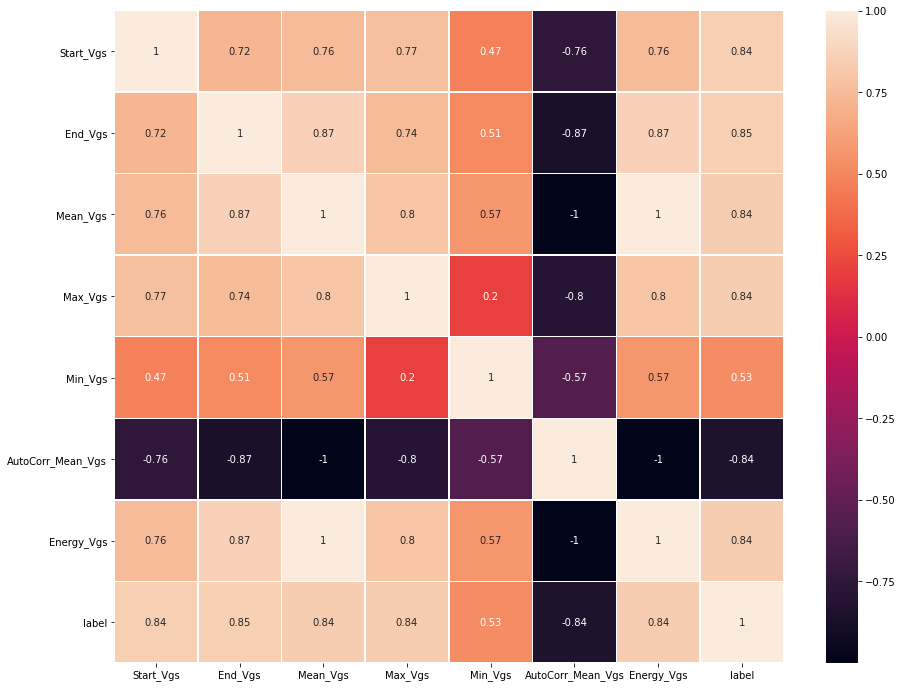



High Correlation:
AutoCorr_Mean_Vgs  Energy_Vgs          -0.999998
Energy_Vgs         AutoCorr_Mean_Vgs   -0.999998
Mean_Vgs           AutoCorr_Mean_Vgs   -0.999998
AutoCorr_Mean_Vgs  Mean_Vgs            -0.999998
                   End_Vgs             -0.865759
                                          ...   
Max_Vgs            Max_Vgs              1.000000
Mean_Vgs           Mean_Vgs             1.000000
End_Vgs            End_Vgs              1.000000
Energy_Vgs         Energy_Vgs           1.000000
label              label                1.000000
Length: 62, dtype: float64


In [33]:
def correlation_matrix(dataframe, th=0.5):
    corr_mat2 = dataframe.corr(method='spearman')
    fig, ax = plt.subplots(figsize=(15, 12))         # Sample figsize in inches
    sns.heatmap(corr_mat2, annot=True, linewidths=.5, ax=ax)
    plt.show()
    corr_pairs = corr_mat2.unstack()
    sorted_pairs = corr_pairs.sort_values(kind="quicksort")
    strong_pairs = sorted_pairs[abs(sorted_pairs) > th]
    print('\n')
    print('High Correlation:')
    print(strong_pairs)

correlation_matrix(data, th=0.46)

In [58]:
data.drop(columns=['AutoCorr_Mean_Vgs',"Mean_Vgs"],inplace=True)
data.head()

,Start_Vgs,End_Vgs,Max_Vgs,Min_Vgs,Energy_Vgs,label
0,-4.289999,-3.68,-0.86,-8.020000,-0.000012,1
1,-4.190000,-3.68,0.10,-8.940000,-0.000012,1
2,-4.140000,-3.60,-2.16,-6.730000,-0.000012,1
3,-4.220000,-3.62,-0.09,-8.629999,-0.000012,1
4,-4.180000,-3.66,0.04,-9.240000,-0.000012,1


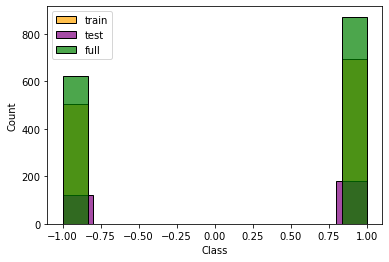

In [59]:
data_c = data.copy()
X = data_c.iloc[:,:5]
y = data_c.iloc[:,5]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=1)

f,a = plt.subplots()
sns.histplot(y_train_c, label='train',ax=a,stat='count',alpha =0.7,color='orange')
sns.histplot(y_test_c,label='test',ax=a,stat='count',alpha =0.7,color='purple')
sns.histplot(y, label='full', ax=a,stat='count',alpha=0.7,color='green')
a.set_xlabel('Class')
a.legend()
plt.show()

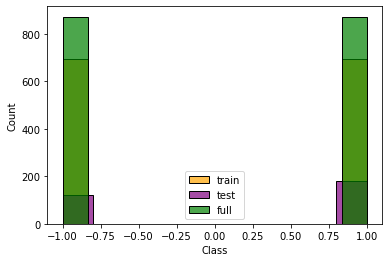

In [60]:

ros = RandomOverSampler(random_state=2)
X_data_c_ros, y_data_c_ros = ros.fit_resample(data_c.iloc[:,0:5], data_c.iloc[:,5])
X_train_c_ros, y_train_c_ros = ros.fit_resample(X_train_c, y_train_c)
X_test_c_ros, y_test_c_ros = X_test_c, y_test_c # re-assign test set

f,a = plt.subplots()
sns.histplot(y_train_c_ros, label='train',ax =a,stat='count',alpha =0.7,color='orange')
sns.histplot(y_test_c_ros,label='test',ax=a,stat='count',alpha =0.7,color='purple')
sns.histplot(y_data_c_ros, label='full', ax=a,stat='count',alpha=0.7,color='green')
a.set_xlabel('Class')
a.legend()
plt.show()

{'clf__C': 1.0974987654930568e-06}
0.9956652540155915
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       120
           1       0.99      1.00      1.00       180

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training Accuracy: 0.996
Test Accuracy: 0.997


[Text(0.5, 1.0, 'Confusion Matrix for test set')]

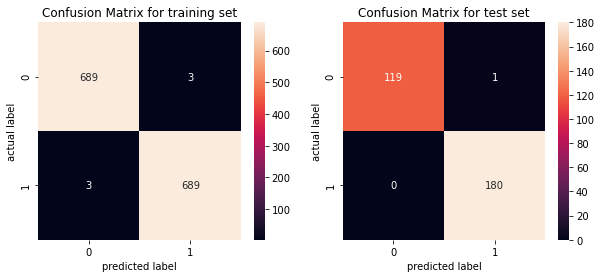

In [43]:
# logistic regression

ct = StandardScaler()
model = LogisticRegression()
pipe = Pipeline([('scaler', ct),('clf',model)]) 

space = dict()
space['clf__C'] = np.logspace(-10,10,100)
logreg_cv = GridSearchCV(pipe, space, scoring='accuracy', n_jobs=-1, cv=5, refit=True)
logreg_cv.fit(X_train_c_ros,y_train_c_ros)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

y_pred_train_c = logreg_cv.predict(X_train_c_ros)
y_pred_test_c = logreg_cv.predict(X_test_c_ros)

print(classification_report(y_test_c_ros, y_pred_test_c))
print("Training Accuracy: {:.3f}".format(accuracy_score(y_train_c_ros, y_pred_train_c)))
print("Test Accuracy: {:.3f}".format(accuracy_score(y_test_c_ros,y_pred_test_c)))

# confusion matix
conf_train = confusion_matrix(y_train_c_ros,y_pred_train_c)
conf_test = confusion_matrix(y_test_c_ros,y_pred_test_c)

fg, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(conf_train, annot=True, fmt="d", ax=ax1)
ax1.set(xlabel="predicted label")
ax1.set(ylabel="actual label")
ax1.set_xticklabels(['0','1'])
ax1.set_yticklabels(['0','1'])
ax1.set(title="Confusion Matrix for training set")
sns.heatmap(conf_test, annot=True, fmt="d", ax=ax2)
ax2.set(xlabel="predicted label")
ax2.set(ylabel="actual label")
ax2.set_xticklabels(['0','1'])
ax2.set_yticklabels(['0','1'])
ax2.set(title="Confusion Matrix for test set")

Text(0.5, 0, 'Logistic Regression Feature Importance')

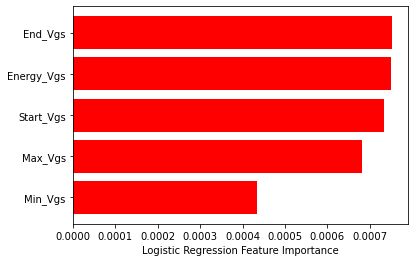

In [44]:
coef = logreg_cv.best_estimator_.named_steps['clf'].coef_[0]
sorted_idx = coef.argsort()
coef.sort()

plt.barh(X.columns[sorted_idx], coef, color='r')
plt.xlabel("Logistic Regression Feature Importance")

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Anaconda\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.99566525 0.99566525 0.99566525 0.99566525 0.99566525 0.99566525
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.99566525 0.99566525 0.99566525 0.99638728 0.99711191 0.99711191
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.99566525 0.99638989 0.99566525 0.99566787 0.99638989 0.99566787
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.99638728 0.99566525 0.99566525 0.99711191 0.99711191 0.99638989
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.99566525 0.99638728 0.99566525 0.99566787 0.99566787 0

{'max_depth': 3, 'max_features': 4, 'n_estimators': 40}
0.9971119133574007
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       120
           1       0.99      1.00      1.00       180

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training Accuracy: 0.997
Test Accuracy: 0.997


[Text(0.5, 1.0, 'Confusion Matrix for test set')]

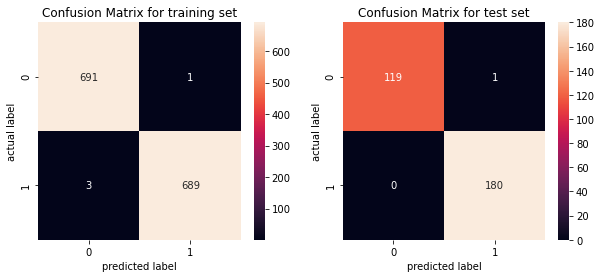

In [49]:
# random forest

rf = RandomForestClassifier()
parameters = {'n_estimators':range(10,100,30),'max_features':range(1,19,3),'max_depth':[1,3,5,15,20]}
rf_cv = GridSearchCV(rf, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=5)
rf_cv.get_params().keys()
rf_cv.fit(X_train_c_ros,y_train_c_ros)

print(rf_cv.best_params_)
print(rf_cv.best_score_)

y_pred_train_c = rf_cv.predict(X_train_c_ros)
y_pred_test_c = rf_cv.predict(X_test_c_ros)

print(classification_report(y_test_c_ros, y_pred_test_c))
print("Training Accuracy: {:.3f}".format(accuracy_score(y_train_c_ros, y_pred_train_c)))
print("Test Accuracy: {:.3f}".format(accuracy_score(y_test_c_ros,y_pred_test_c)))

# confusion matix
conf_train = confusion_matrix(y_train_c_ros,y_pred_train_c)
conf_test = confusion_matrix(y_test_c_ros,y_pred_test_c)

fg, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(conf_train, annot=True, fmt="d", ax=ax1)
ax1.set(xlabel="predicted label")
ax1.set(ylabel="actual label")
ax1.set_xticklabels(['0','1'])
ax1.set_yticklabels(['0','1'])
ax1.set(title="Confusion Matrix for training set")
sns.heatmap(conf_test, annot=True, fmt="d", ax=ax2)
ax2.set(xlabel="predicted label")
ax2.set(ylabel="actual label")
ax2.set_xticklabels(['0','1'])
ax2.set_yticklabels(['0','1'])
ax2.set(title="Confusion Matrix for test set")

Text(0.5, 0, 'Random Forest Feature Importance')

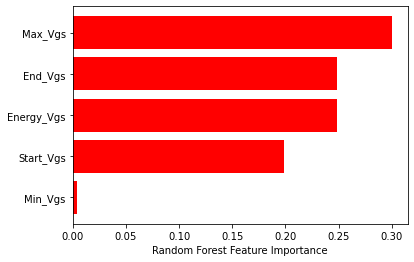

In [50]:
coef = rf_cv.best_estimator_.feature_importances_
sorted_idx = coef.argsort()
coef.sort()

plt.barh(X.columns[sorted_idx], coef,color='r')
plt.xlabel("Random Forest Feature Importance")

{'PCA': PCA(n_components=1), 'PCA__n_components': 1, 'SVC__C': 0.1, 'SVC__gamma': 10, 'SVC__kernel': 'linear'}
0.9956521739130435
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       120
           1       0.99      1.00      1.00       180

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training Accuracy: 0.996
Test Accuracy: 0.997


[Text(0.5, 1.0, 'Confusion Matrix for test set')]

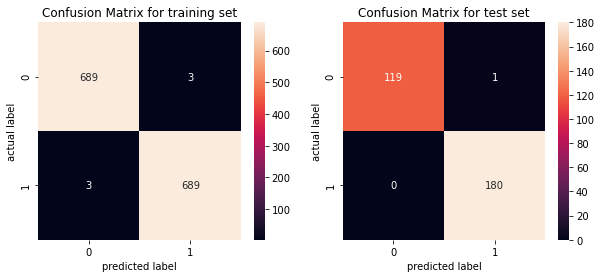

In [53]:
# support vector machine

model_svc = Pipeline(steps=[('StandardScaler', StandardScaler()), ('PCA', 'passthrough'), ('SVC', SVC())])
param_grid = [
    {
    'PCA': [PCA()],
    'PCA__n_components': np.arange(X_train_c.shape[1])+1,
    'SVC__kernel': ['linear'],
    'SVC__C': [0.1, 1, 10, 100],
    'SVC__gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001]
    },
    {
    'PCA': ['passthrough'],
    'SVC__kernel': ['linear'],
    'SVC__C': [0.1, 1, 10, 100],
    'SVC__gamma':[10, 1, 0.1, 0.01, 0.001, 0.0001]
    }
]

svm_cv = GridSearchCV(model_svc, param_grid, scoring='accuracy', n_jobs=-1, cv=10)
svm_cv.fit(X_train_c_ros,y_train_c_ros)

print(svm_cv.best_params_)
print(svm_cv.best_score_)

y_pred_train_c = svm_cv.predict(X_train_c_ros)
y_pred_test_c = svm_cv.predict(X_test_c_ros)

print(classification_report(y_test_c_ros, y_pred_test_c))
print("Training Accuracy: {:.3f}".format(accuracy_score(y_train_c_ros, y_pred_train_c)))
print("Test Accuracy: {:.3f}".format(accuracy_score(y_test_c_ros,y_pred_test_c)))

# confusion matix
conf_train = confusion_matrix(y_train_c_ros,y_pred_train_c)
conf_test = confusion_matrix(y_test_c_ros,y_pred_test_c)

fg, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(conf_train, annot=True, fmt="d", ax=ax1)
ax1.set(xlabel="predicted label")
ax1.set(ylabel="actual label")
ax1.set_xticklabels(['0','1'])
ax1.set_yticklabels(['0','1'])
ax1.set(title="Confusion Matrix for training set")
sns.heatmap(conf_test, annot=True, fmt="d", ax=ax2)
ax2.set(xlabel="predicted label")
ax2.set(ylabel="actual label")
ax2.set_xticklabels(['0','1'])
ax2.set_yticklabels(['0','1'])
ax2.set(title="Confusion Matrix for test set")

Text(0.5, 0, 'SVC Feature Importance')

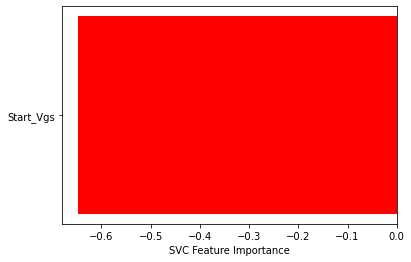

In [52]:
coef = svm_cv.best_estimator_.named_steps['SVC'].coef_[0]
sorted_idx = coef.argsort()
coef = sorted(coef)
plt.barh(X.columns[sorted_idx], coef,color='r')
plt.xlabel("SVC Feature Importance")

Fitting 5 folds for each of 140 candidates, totalling 700 fits


C:\Anaconda\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 3, 'n_estimators': 260}
0.9963898916967509
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       120
           1       0.99      1.00      1.00       180

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Training Accuracy: 1.000
Test Accuracy: 0.997


[Text(0.5, 1.0, 'Confusion Matrix for test set')]

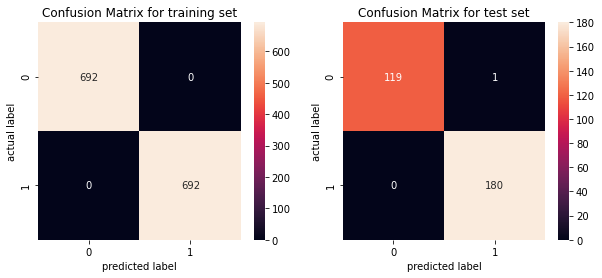

In [67]:
# xgboost

XGB = XGBClassifier(objective='binary:logistic', booster='gbtree')
parameters = {'n_estimators': range(10,700,50),'max_depth':range(1,20,2)}
XGB_cv = GridSearchCV(XGB, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=5)
XGB_cv.get_params().keys()
XGB_cv.fit(X_train_c_ros,y_train_c_ros)

print(XGB_cv.best_params_)
print(XGB_cv.best_score_)

y_pred_train_c = XGB_cv.predict(X_train_c_ros)
y_pred_test_c = XGB_cv.predict(X_test_c_ros)

print(classification_report(y_test_c_ros, y_pred_test_c))

print("Training Accuracy: {:.3f}".format(accuracy_score(y_train_c_ros, y_pred_train_c)))
print("Test Accuracy: {:.3f}".format(accuracy_score(y_test_c_ros,y_pred_test_c)))

# confusion matix
conf_train = confusion_matrix(y_train_c_ros,y_pred_train_c)
conf_test = confusion_matrix(y_test_c_ros,y_pred_test_c)

fg, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(conf_train, annot=True, fmt="d", ax=ax1)
ax1.set(xlabel="predicted label")
ax1.set(ylabel="actual label")
ax1.set_xticklabels(['0','1'])
ax1.set_yticklabels(['0','1'])
ax1.set(title="Confusion Matrix for training set")
sns.heatmap(conf_test, annot=True, fmt="d", ax=ax2)
ax2.set(xlabel="predicted label")
ax2.set(ylabel="actual label")
ax2.set_xticklabels(['0','1'])
ax2.set_yticklabels(['0','1'])
ax2.set(title="Confusion Matrix for test set")

<AxesSubplot:>

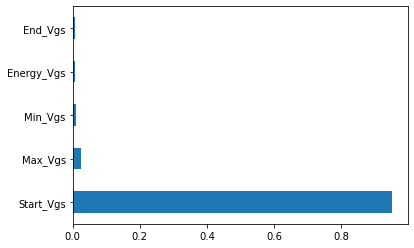

In [84]:
%matplotlib inline
Predictors = ['Start_Vgs', 'End_Vgs', 'Max_Vgs', 'Min_Vgs', 'Energy_Vgs']
feature_importances = pd.Series(XGB_cv.best_estimator_.feature_importances_, index=Predictors)
feature_importances.nlargest(5).plot(kind='barh')

In [73]:
# save model

joblib.dump(XGB_cv, "C:/Runyao/XGB.joblib")

['C:/Runyao/XGB.joblib']

In [ ]:
test_data = pd.read_csv("C:/Runyao/11.23/feature_155820280_11.23.csv")
test_data.drop(columns=test_data.columns[[0,1]], axis=1, inplace=True)
test_data.drop(columns=['AutoCorr_Mean_Vgs',"Mean_Vgs"],inplace=True)

In [78]:
loaded_XGB = joblib.load("C:/Runyao/XGB.joblib")
loaded_XGB.predict(test_data)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1], dtype=int64)